# NLP - CHALLENGE 1 - SPAM SMS DETECTION

**First of all, importing all the required libraries for data preprocessing**

---






In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Importing the SMS spam detection dataset**

---

In [2]:
df_train = pd.read_csv("/content/Train Data.csv", encoding='latin-1')
df_train.head()

,type,text
0,ham,Hope you are having a good week. Just checking...
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
df_train.shape

(4000, 2)

In [4]:
df_test = pd.read_csv("/content/Test Dataset.csv", encoding='latin-1')
df_test.head()

,id,text
0,1,I wnt to buy a BMW car urgently..its vry urgen...
1,2,Dunno lei shd b driving lor cos i go sch 1 hr ...
2,3,Dun need to use dial up juz open da browser n ...
3,4,Just got outta class gonna go gym.
4,5,In xam hall boy asked girl Tell me the startin...


In [5]:
df_test.shape

(1559, 2)

**Combining train & test dataset**

---


In [6]:
df1 = pd.concat([df_train, df_test])

df1.head()


,type,text,id
0,ham,Hope you are having a good week. Just checking...,NaN
1,ham,K..give back my thanks.,NaN
2,ham,Am also doing in cbe only. But have to pay.,NaN
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",NaN
4,spam,okmail: Dear Dave this is your final notice to...,NaN


**Checking Rows & Columns**

---


In [7]:
df1.shape

(5559, 3)

In [8]:
df1.tail()

,type,text,id
1554,NaN,You are a great role model. You are giving so ...,1555.0
1555,NaN,"Awesome, I remember the last time we got someb...",1556.0
1556,NaN,"If you don't, your prize will go to another cu...",1557.0
1557,NaN,"SMS. ac JSco: Energy is high, but u may not kn...",1558.0
1558,NaN,Shall call now dear having food,1559.0


**Data Cleaning and Preprocessing**

In [9]:
df1.drop(["id"], axis=1, inplace=True)
df1.head()

,type,text
0,ham,Hope you are having a good week. Just checking...
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


**The number of ham messages is more than that of spam messages in the data.**

In [10]:
df1.describe()

,type,text
count,4000,5559
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,3460,30


In [11]:
df1 = df1.dropna()

df1.shape

(4000, 2)

In [12]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [13]:
df1['length'] = df1['text'].apply(len)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,text,length
0,ham,Hope you are having a good week. Just checking...,79
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


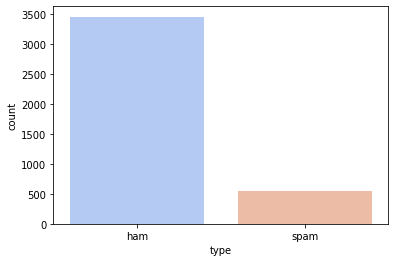

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string


sns.countplot(df1['type'],palette='coolwarm')

In [15]:
def clean(df1):
    nopunc = [word for word in df1 if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    m = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return m

In [16]:
cv = CountVectorizer(analyzer = clean).fit(df1['text'])


In [17]:
cvt = cv.transform(df1['text'])

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(cvt)
messages_tfidf = tfidf_transformer.transform(cvt)

In [19]:
X = df1['text']
y = df1['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
nbpl = Pipeline([
    ('cv', CountVectorizer(analyzer=clean)),
    ('transform', TfidfTransformer()), 
    ('alg', MultinomialNB()),
])

In [21]:
nbpl.fit(X_train,y_train)
nbpred = nbpl.predict(X_test)

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1047
        spam       0.99      0.65      0.79       153

    accuracy                           0.95      1200
   macro avg       0.97      0.83      0.88      1200
weighted avg       0.96      0.95      0.95      1200


 confusion matrix


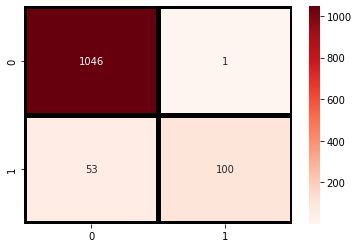

In [22]:
print(classification_report(y_test,nbpred))
print('\n confusion matrix')
sns.heatmap(confusion_matrix(y_test,nbpred),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

In [23]:

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, nbpred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.955
